# Частина друга: Аналіз файлів


In [676]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Прочитайте файл 2017_jun_final.csv за допомогою методу `read_csv`

In [677]:
df = pd.read_csv('2017_jun_final.csv')

## Прочитайте отриману таблицю, використовуючи метод `head`

In [678]:
df.head()

,N,Посада,Мова програмування,Спеціалізація,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,...,Ще студент,Рівень англійської,Предметна область,Дата заповнення,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харків,до 10 осіб,...,True,Pre-intermediate (нище середнього),"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,менше 3 місяців,менше 3 місяців,430,130,Харків,більше 1000 осіб,...,True,Upper-Intermediate (вище середнього),Веб-розробка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Київ,до 1000 осіб,...,False,Intermediate (середній),"Веб-розробка,Корпоративні системи",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одеса,до 200 осіб,...,False,Pre-intermediate (нище середнього),"Desktop Applications,Веб-розробка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 і більше років,0.5,4500,500,Інше,до 10 осіб,...,False,Intermediate (середній),"Desktop Applications,Веб-розробка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


## Визначте розмір таблиці за допомогою методу `shape`

In [679]:
df.shape

(8704, 25)

## Визначте типи всіх стовпців за допомогою `dataframe.dtypes`

In [680]:
df.dtypes

N                                     int64
Посада                               object
Мова програмування                   object
Спеціалізація                        object
Загальний досвід роботи              object
Досвід роботи на поточному місці     object
Зарплата на місяць                    int64
Зміна зарплати за 12 місяців          int64
Місто                                object
Розмір компанії                      object
Тип компанії                         object
Стать                                object
Вік                                   int64
Освіта                               object
Університет                          object
Ще студент                             bool
Рівень англійської                   object
Предметна область                    object
Дата заповнення                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

## Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи `isnull` та `sum`)

In [681]:
round(df.isnull().sum()*100/df.shape[0], 2).astype(str) + ' %'

N                                     0.0 %
Посада                                0.0 %
Мова програмування                  44.23 %
Спеціалізація                       82.94 %
Загальний досвід роботи               0.0 %
Досвід роботи на поточному місці      0.0 %
Зарплата на місяць                    0.0 %
Зміна зарплати за 12 місяців          0.0 %
Місто                                 0.0 %
Розмір компанії                       0.0 %
Тип компанії                          0.0 %
Стать                                 0.0 %
Вік                                   0.0 %
Освіта                                0.0 %
Університет                          4.11 %
Ще студент                            0.0 %
Рівень англійської                    0.0 %
Предметна область                    2.56 %
Дата заповнення                       0.0 %
User.Agent                            0.0 %
exp                                   0.0 %
current_job_exp                       0.0 %
salary                          

## Видаліть усі стовпці з пропусками, крім стовпця **"Мова програмування"**

In [682]:
# columns_with_null = ['Спеціалізація', 'Університет', 'Предметна область', 'Валюта', 'cls']
columns_with_null = df.columns[df.isna().any() & (df.columns != 'Мова програмування')]
df.drop(columns_with_null, inplace=True, axis=1)

## Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець **"Мова.програмування"**

In [683]:
round(df.isnull().sum()*100/df.shape[0], 2).astype(str) + ' %'

N                                     0.0 %
Посада                                0.0 %
Мова програмування                  44.23 %
Загальний досвід роботи               0.0 %
Досвід роботи на поточному місці      0.0 %
Зарплата на місяць                    0.0 %
Зміна зарплати за 12 місяців          0.0 %
Місто                                 0.0 %
Розмір компанії                       0.0 %
Тип компанії                          0.0 %
Стать                                 0.0 %
Вік                                   0.0 %
Освіта                                0.0 %
Ще студент                            0.0 %
Рівень англійської                    0.0 %
Дата заповнення                       0.0 %
User.Agent                            0.0 %
exp                                   0.0 %
current_job_exp                       0.0 %
salary                                0.0 %
dtype: object



## Видаліть усі рядки у вихідній таблиці за допомогою методу `dropna`



In [684]:
df.dropna(inplace=True)
df.head()

,N,Посада,Мова програмування,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,Тип компанії,Стать,Вік,Освіта,Ще студент,Рівень англійської,Дата заповнення,User.Agent,exp,current_job_exp,salary
2,3,Software Engineer,C#/.NET,4,1,2500,800,Київ,до 1000 осіб,Аутсорсингова,чоловіча,26,Вища,False,Intermediate (середній),12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500
3,4,Software Engineer,JavaScript,5,4,2000,400,Одеса,до 200 осіб,Продуктова,чоловіча,30,Середня,False,Pre-intermediate (нище середнього),12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000
4,5,Senior Software Engineer,JavaScript,10 і більше років,0.5,4500,500,Інше,до 10 осіб,Продуктова,чоловіча,30,Технікум / Коледж,False,Intermediate (середній),12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500
6,7,Junior Software Engineer,C#/.NET,1,менше 3 місяців,600,100,Хмельницький,до 50 осіб,Аутсорсингова,чоловіча,23,Вища,False,Pre-intermediate (нище середнього),12/06/2017 13:04:26,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.0,0.0,600
7,8,Senior Software Engineer,C++,6,1,3300,500,Київ,до 10 осіб,Продуктова,чоловіча,28,Вища,False,Upper-Intermediate (вище середнього),12/06/2017 13:04:27,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:53....,6.0,1.0,3300


## Визначте новий розмір таблиці за допомогою методу `shape`

In [685]:
df.shape

(4854, 20)

## Створіть нову таблицю `python_data`, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування `Python`

In [686]:
python_data = df.query("`Мова програмування`.str.contains('Python')")

## Визначте розмір таблиці `python_data` за допомогою методу `shape`

In [687]:
python_data.shape

(207, 20)

## Використовуючи метод `groupby`, виконайте групування за стовпчиком **"Посада"**

In [688]:
grouped_data = python_data.groupby("Посада")
grouped_data.size()

Посада
Junior Software Engineer     63
Senior Software Engineer     31
Software Engineer           100
System Architect              2
Technical Lead               11
dtype: int64

## Створіть новий `DataFrame`, де для згрупованих даних за стовпчиком **"Посада"**, виконайте агрегацію даних за допомогою методу `agg` і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"

In [689]:
grouped_by_job_and_salary = grouped_data['Зарплата на місяць'].agg(['min', 'max'])
grouped_by_job_and_salary.head()

,min,max
Посада,,
Junior Software Engineer,100,1250
Senior Software Engineer,1300,9200
Software Engineer,500,5400
System Architect,3000,5000
Technical Lead,1425,6200


## Створіть функцію `fill_avg_salary`, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу apply та створіть новий стовпчик `"avg"`

In [690]:
def fill_avg_salary(salary):
    return round(salary.mean(), 2)

grouped_by_job_and_salary['avg'] = grouped_by_job_and_salary.apply(fill_avg_salary, axis=1)

grouped_by_job_and_salary

,min,max,avg
Посада,,,
Junior Software Engineer,100,1250,675.0
Senior Software Engineer,1300,9200,5250.0
Software Engineer,500,5400,2950.0
System Architect,3000,5000,4000.0
Technical Lead,1425,6200,3812.5


## Створіть описову статистику за допомогою методу `describe` для нового стовпчика.

In [691]:
grouped_by_job_and_salary['avg'].describe().round(2)

count       5.00
mean     3337.50
std      1700.09
min       675.00
25%      2950.00
50%      3812.50
75%      4000.00
max      5250.00
Name: avg, dtype: float64

## Збережіть отриману таблицю в CSV файл

In [692]:
grouped_by_job_and_salary.to_csv('salary_stat.csv')

## Графіки

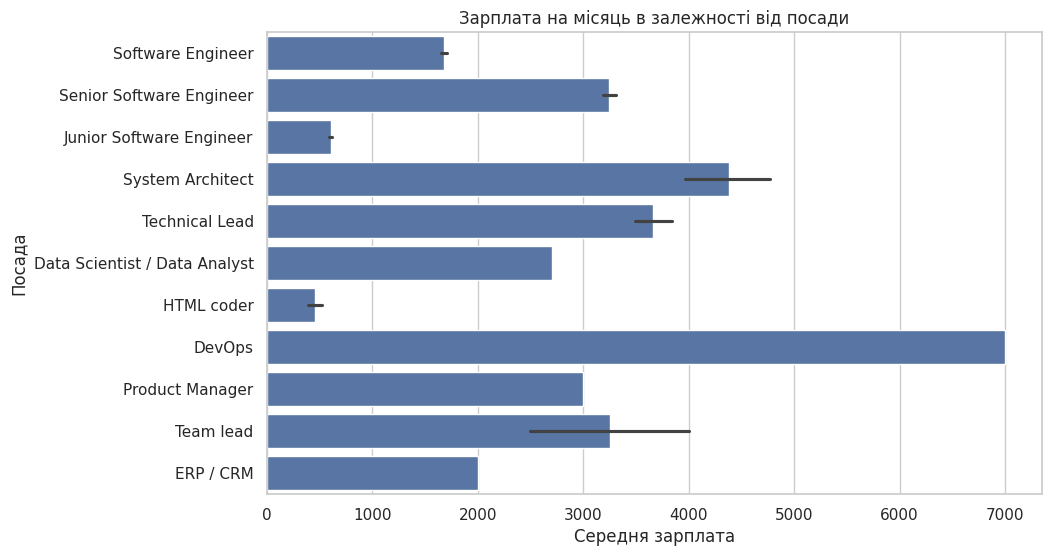

In [693]:
# 1.1: Bar plot of the average salary by position (df)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Зарплата на місяць', y='Посада', data=df, estimator=np.mean)
plt.title('Зарплата на місяць в залежності від посади')
plt.xlabel('Середня зарплата')
plt.ylabel('Посада')
plt.show()

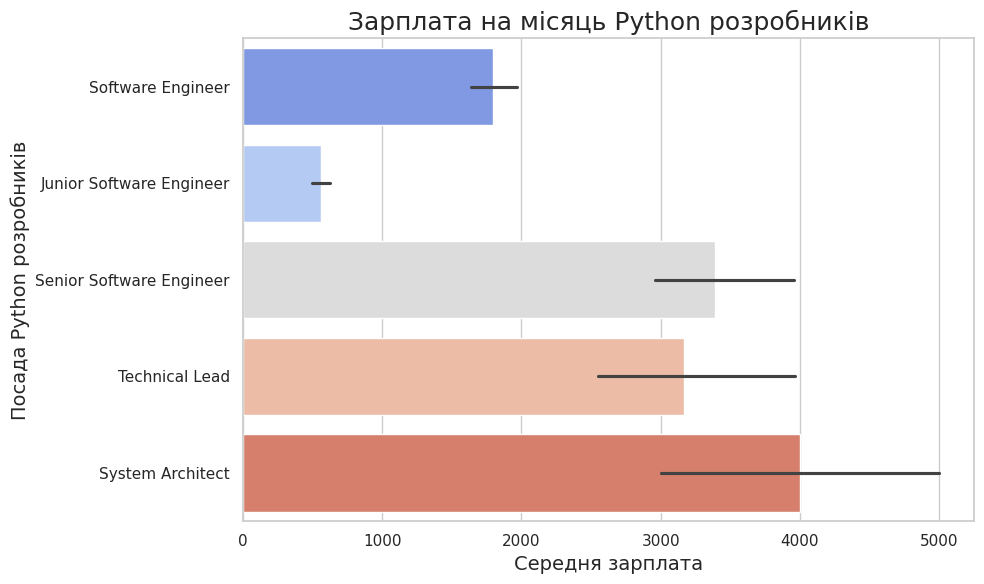

In [694]:
# 1.2: Bar plot of the average salary by position (python_data)
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    x='Зарплата на місяць',
    y='Посада',
    data=python_data,
    estimator=np.mean,
    hue='Посада',
    palette='coolwarm'
)

ax.set_title('Зарплата на місяць Python розробників', fontsize=18)
ax.set_xlabel('Середня зарплата', fontsize=14)
ax.set_ylabel('Посада Python розробників', fontsize=14)

plt.tight_layout()

plt.show()

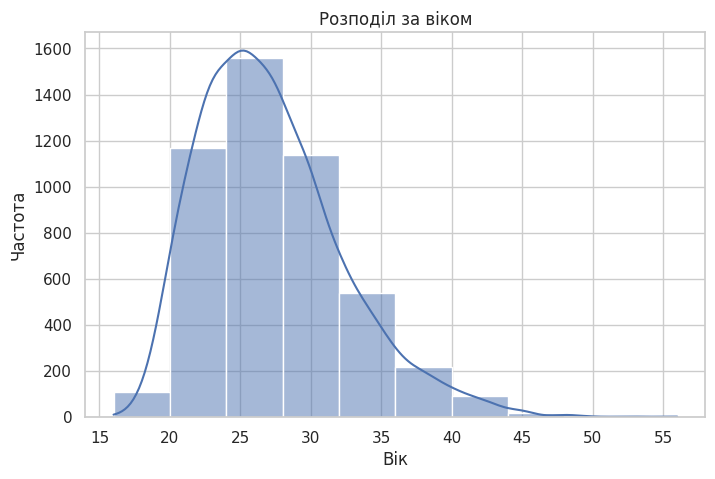

In [695]:
#: Histogram of the age distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Вік'], bins=10, kde=True)
plt.title('Розподіл за віком')
plt.xlabel('Вік')
plt.ylabel('Частота')
plt.show()

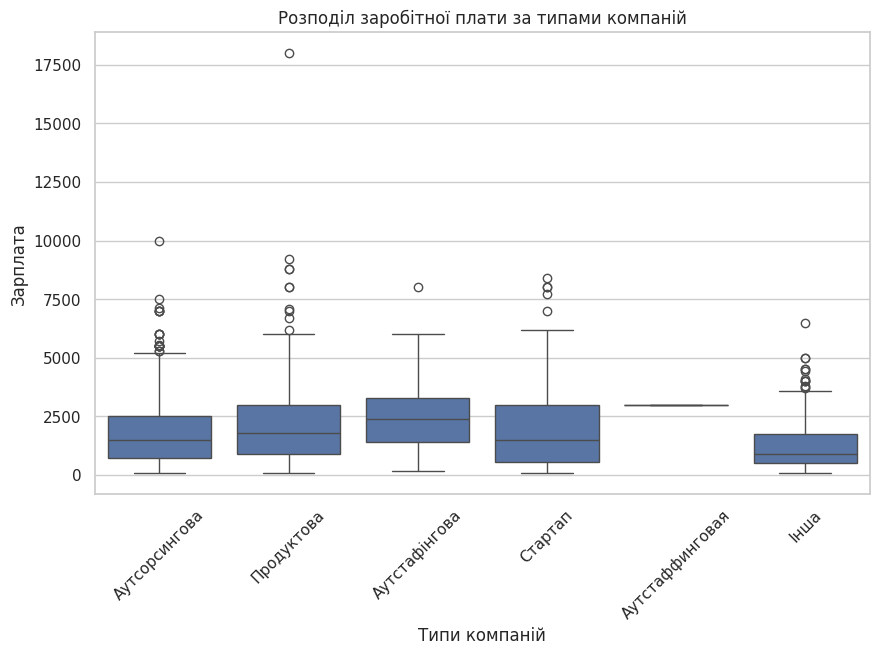

In [696]:
# 3: Box plot of salaries by company type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Тип компанії', y='Зарплата на місяць', data=df)
plt.title('Розподіл заробітної плати за типами компаній')
plt.xlabel('Типи компаній')
plt.ylabel('Зарплата')
plt.xticks(rotation=45)
plt.show()

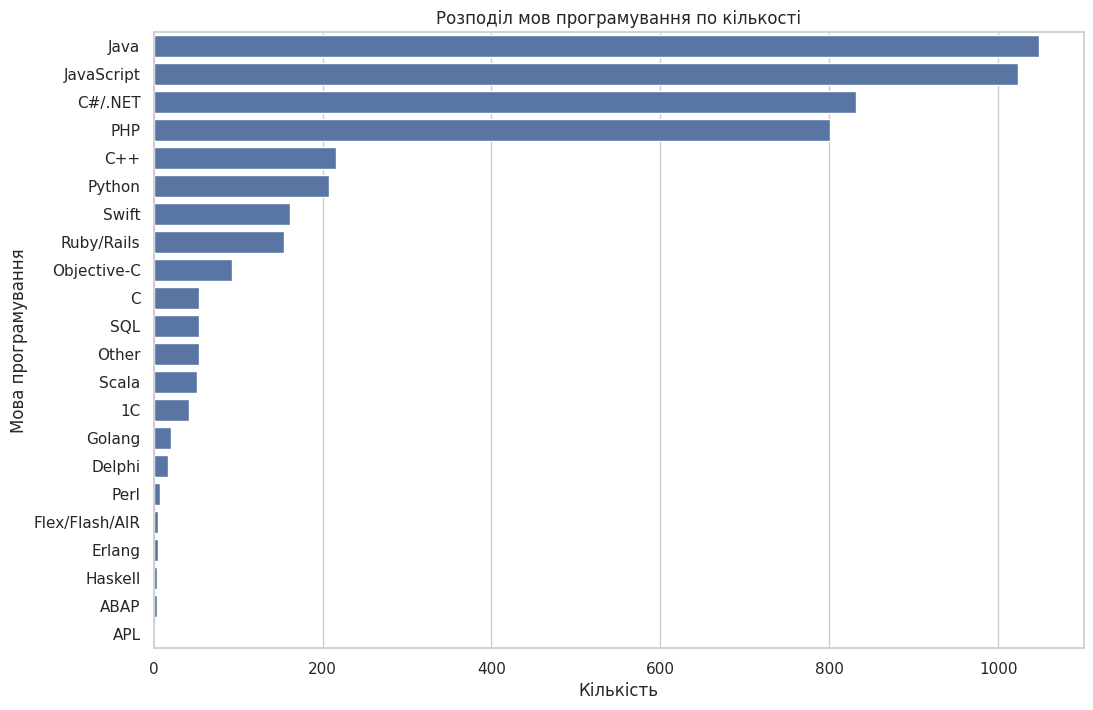

In [697]:
# 4: Count plot of programming languages
sns.set(style="whitegrid")
order = df['Мова програмування'].value_counts(ascending=False).index
plt.figure(figsize=(12, 8))
sns.countplot(
    y='Мова програмування',
    data=df,
    order=order
)
plt.title('Розподіл мов програмування по кількості')
plt.xlabel('Кількість')
plt.ylabel('Мова програмування')
plt.show()

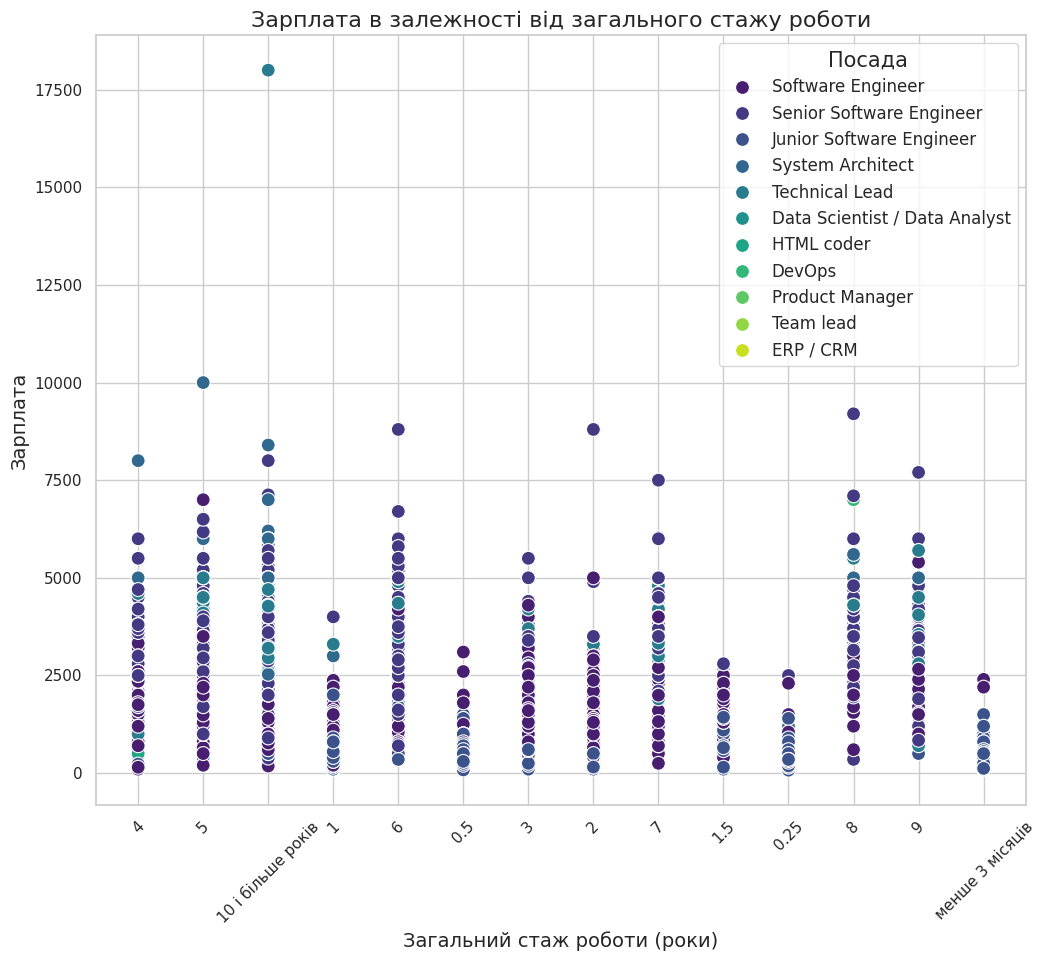

In [698]:
# 5.1: Scatter plot of salary vs. experience (all data, years unsorted)
sns.set(style="whitegrid")

plt.figure(figsize=(12, 10))
scatter = sns.scatterplot(
    x='Загальний досвід роботи',
    y='Зарплата на місяць',
    data=df,
    hue='Посада',
    palette='viridis',
    s=100,
)
plt.title('Зарплата в залежності від загального стажу роботи', fontsize=16)
plt.xlabel('Загальний стаж роботи (роки)', fontsize=14)
plt.ylabel('Зарплата', fontsize=14)
plt.legend(title='Посада', loc='upper right', fontsize='medium', title_fontsize='15')
plt.xticks(rotation=45)
plt.show()


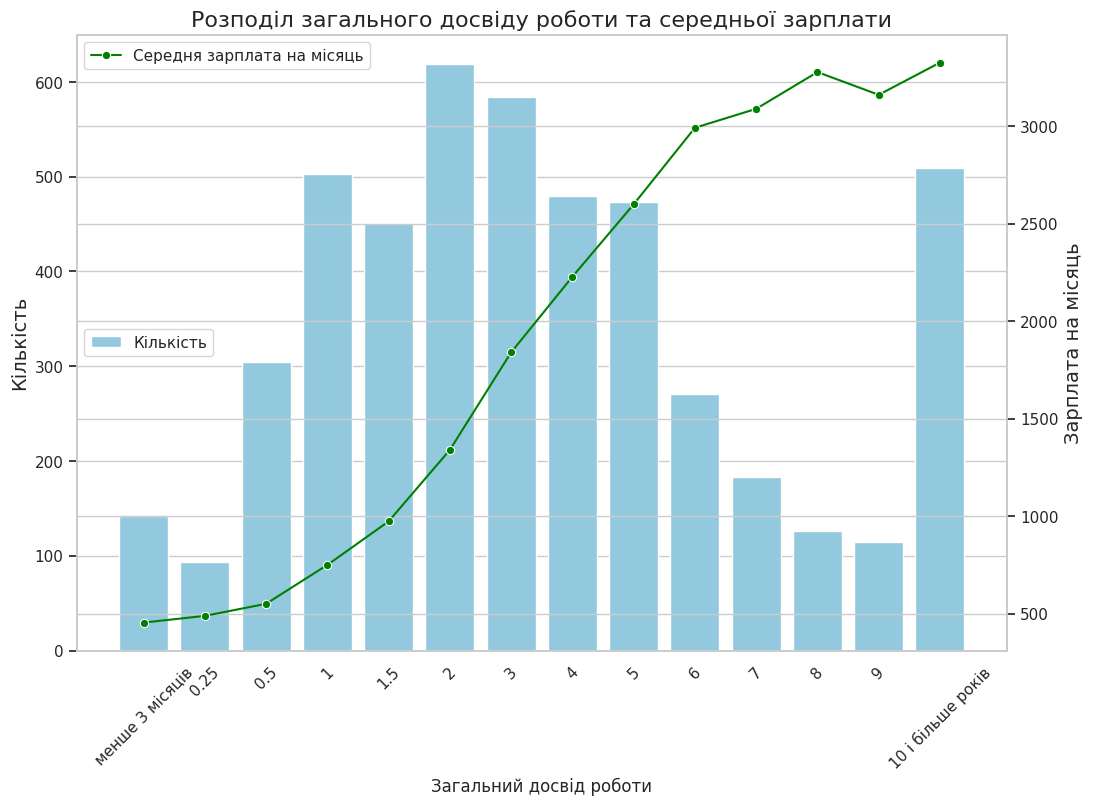

In [699]:
# 6: Barplot + lineplot = Count + median salary
# df = pd.read_csv('2017_jun_final.csv')
df['Загальний досвід роботи'] = df['Загальний досвід роботи'].astype(str)
df_numeric = df[pd.to_numeric(df['Загальний досвід роботи'], errors='coerce').notnull()]
df_non_numeric = df[pd.to_numeric(df['Загальний досвід роботи'], errors='coerce').isnull()]
df_numeric['Загальний досвід роботи'].astype(float)
combined_counts = df_numeric['Загальний досвід роботи'].astype(str).value_counts() \
                  .add(df_non_numeric['Загальний досвід роботи'].value_counts(), fill_value=0)

new_order = ['менше 3 місяців'] + [str(x) for x in combined_counts.index if x not in ['менше 3 місяців', '10 і більше років']] + ['10 і більше років']

combined_counts_reordered = combined_counts.reindex(new_order)

mean_salary = df.groupby('Загальний досвід роботи')['Зарплата на місяць'].mean()
df_counts = pd.DataFrame({'Counts': combined_counts_reordered})

df_combined = df_counts.join(mean_salary)
df_combined = df_combined.reindex(new_order)

#print(df_combined)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(
    x=df_combined.index,
    y='Counts',
    data=df_combined,
    color='skyblue',
    label='Кількість'
)
plt.xticks(rotation=45)

ax2 = plt.twinx()
line_plot = sns.lineplot(
    x=df_combined.index,
    y='Зарплата на місяць',
    data=df_combined,
    color='green',
    marker='o',
    label='Середня зарплата на місяць'
)

plt.title('Розподіл загального досвіду роботи та середньої зарплати', fontsize=16)
plt.xlabel('Загальний досвід роботи', fontsize=14)
bar_plot.set_ylabel('Кількість', fontsize=14)
ax2.set_ylabel('Зарплата на місяць', fontsize=14)

bar_plot.legend(loc='center left')
ax2.legend(loc='upper left')

plt.show()

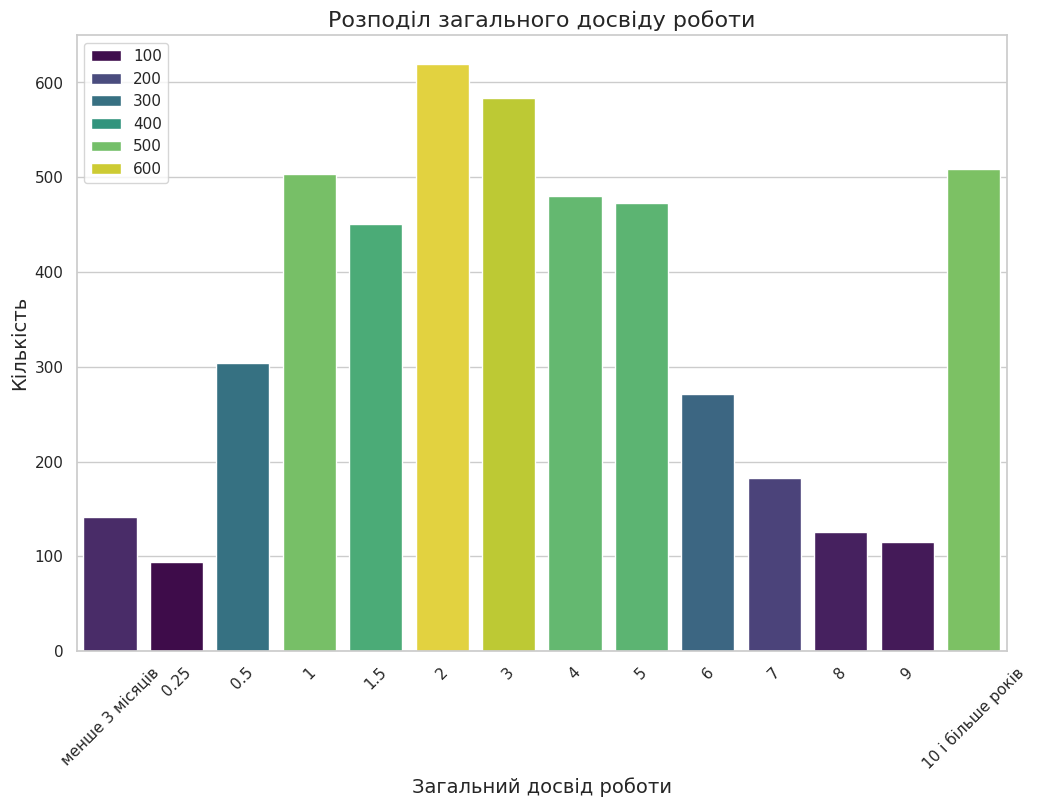

In [700]:
# 6.2 As previous but good looking and without salary
# df = pd.read_csv('2017_jun_final.csv')
df_numeric = df[pd.to_numeric(df['Загальний досвід роботи'], errors='coerce').notnull()]
df_non_numeric = df[pd.to_numeric(df['Загальний досвід роботи'], errors='coerce').isnull()]
df_numeric['Загальний досвід роботи'].astype(float)
combined_counts = df_numeric['Загальний досвід роботи'].astype(str).value_counts() \
                  .add(df_non_numeric['Загальний досвід роботи'].value_counts(), fill_value=0)

new_order = ['менше 3 місяців'] + [str(x) for x in combined_counts.index if x not in ['менше 3 місяців', '10 і більше років']] + ['10 і більше років']

combined_counts_reordered = combined_counts.reindex(new_order)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(
    x=combined_counts_reordered.index,
    y=combined_counts_reordered.values,
    hue=combined_counts_reordered.values,
    palette='viridis'
)
plt.title('Розподіл загального досвіду роботи', fontsize=16)
plt.xlabel('Загальний досвід роботи', fontsize=14)
plt.ylabel('Кількість', fontsize=14)
plt.xticks(rotation=45)
plt.show()